In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

In [2]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i, val in enumerate(x):
        # f(x + h)
        x[i] = val + h
        f1 = f(x)
        # f(x - h)
        x[i] = val - h
        f2 = f(x)
        # grad
        grad[i] = (f1 - f2) / (2 * h)
        # restore
        x[i] = val
    return grad

In [3]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    path = np.zeros((step_num, init_x.size), dtype=np.float32)
    grad = np.zeros((step_num, init_x.size), dtype=np.float32)
    path[0] = init_x
    grad[0] = numerical_gradient(f, path[0])
    for i in range(1, step_num):
        path[i] = path[i - 1] - (lr * grad[i - 1])
        grad[i] = numerical_gradient(f, path[i])
    return path, grad

In [4]:
def momentum(f, init_x, lr=0.01, step_num=100, alpha=0.9):
    path = np.zeros((step_num, init_x.size), dtype=np.float32)
    grad = np.zeros((step_num, init_x.size), dtype=np.float32)
    velc = np.zeros((step_num, init_x.size), dtype=np.float32)
    path[0] = init_x
    grad[0] = numerical_gradient(f, path[0])
    velc[0] = -lr * grad[0]
    for i in range(1, step_num):
        path[i] = path[i - 1] + velc[i - 1]
        grad[i] = numerical_gradient(f, path[i])
        velc[i] = alpha * velc[i - 1] - lr * grad[i]
    return path, grad, velc

In [5]:
def plot_3d(ax, f, limit=10, interval=1, elev=45, azim=30):
    xs = np.arange(-limit, +limit, interval)
    ys = np.arange(-limit, +limit, interval)
    x0, x1 = np.meshgrid(xs, ys, sparse=True)
    ax.plot_surface(x0, x1, f([x0, x1]) , cmap=plt.cm.jet, alpha=0.7)
    ax.view_init(elev=elev, azim=azim)
    return ax

def plot_3d_path(ax, f, xs, ys):
    ax.plot(xs, ys, f([xs, ys]), color='k', marker='o', markersize=6)
    return ax

$
\begin{align}
f_1(x) &= x^4 - 3x^2 + 2 \\
f_2(x) &= 100(x_1 - x_0)^2 + (1 - x_0)^2 \\
f_3(x) &= x_0^2 + x_1^2 \\
f_4(x) &= \frac{1}{20} x_0^2 + x_1^2
\end{align}
$

In [6]:
def f1(x):
    return x**4 - 3 * x**2 + 2

def f2(x): # "fake" banana function
    return 100 * (x[1] - x[0]) ** 2 + (1 - x[0])**2

def f3(x):
    return x[0]**2 + x[1]**2

def f4(x):
    return 1/20 * x[0]**2 + x[1]**2

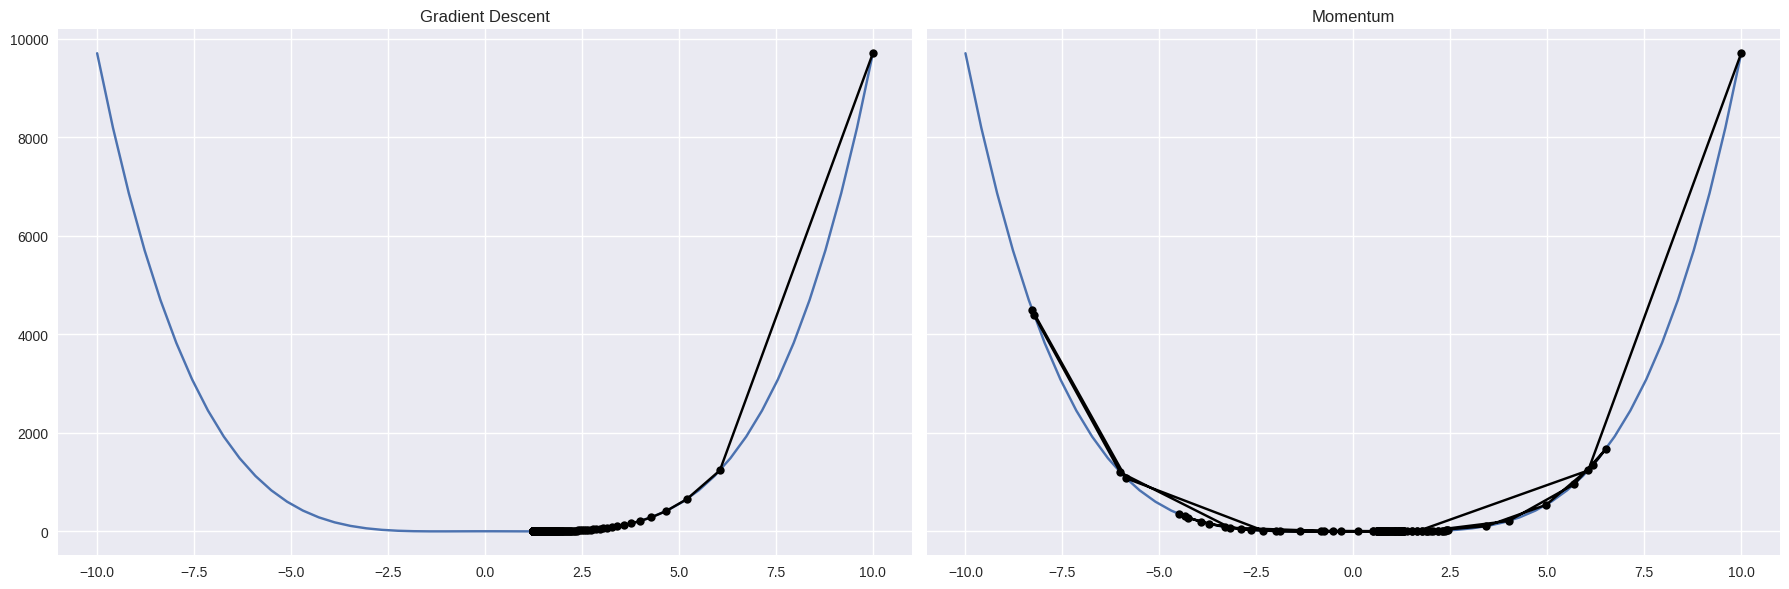

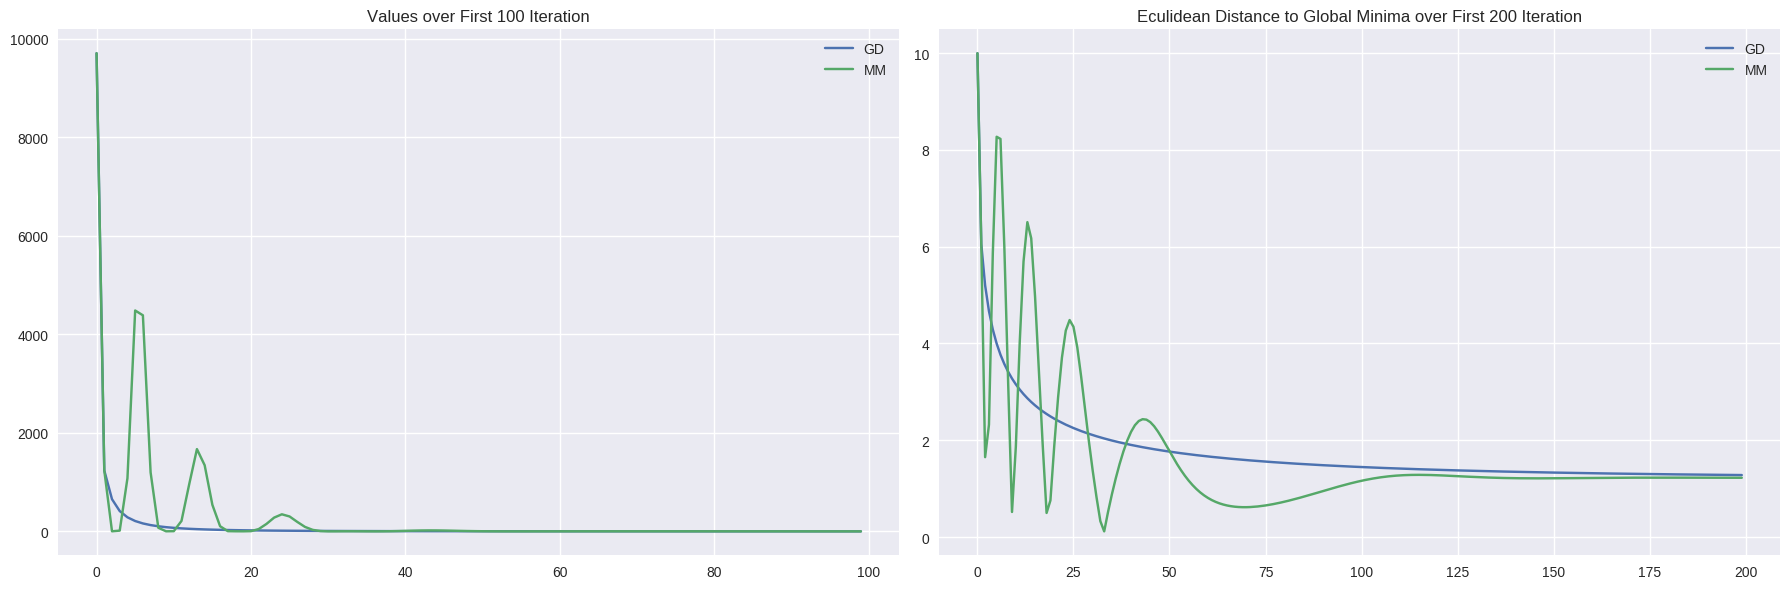

In [7]:
path1, grad1 = gradient_descent(f1, np.array([10.0]), lr=0.001, step_num=1000)
path2, grad2, velc2 = momentum(f1, np.array([10.0]), lr=0.001, step_num=1000, alpha=0.9)

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 6), dpi=100)
xs = np.linspace(-10, 10, 50)
ax[0].set_title('Gradient Descent')
ax[0].plot(xs, f1(xs))
ax[0].plot(path1[:, 0], f1(path1[:, 0]), color='k', marker='o', markersize=6)
ax[1].set_title('Momentum')
ax[1].plot(xs, f1(xs))
ax[1].plot(path2[:, 0], f1(path2[:, 0]), color='k', marker='o', markersize=6)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(18, 6))
ax[0].set_title('Values over First 100 Iteration')
ax[0].plot(f1(path1[:100]), label='GD')
ax[0].plot(f1(path2[:100]), label='MM')
ax[0].legend()
ax[1].set_title('Eculidean Distance to Global Minima over First 200 Iteration')
ax[1].plot(LA.norm(path1[:200], axis=1), label='GD')
ax[1].plot(LA.norm(path2[:200], axis=1), label='MM')
ax[1].legend()
fig.tight_layout()
plt.show()

GD: [6.092138 6.117662]
MM: [1.0004725 1.0004749]


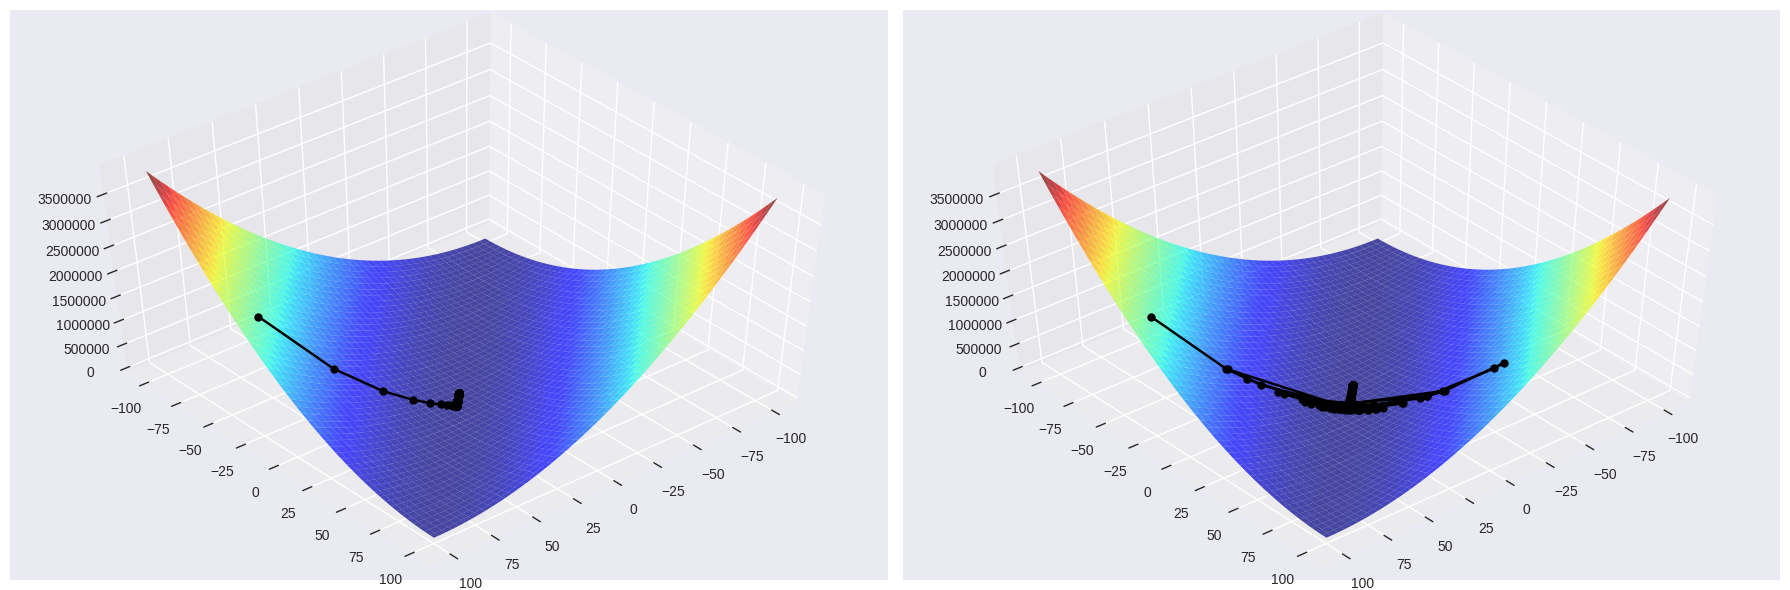

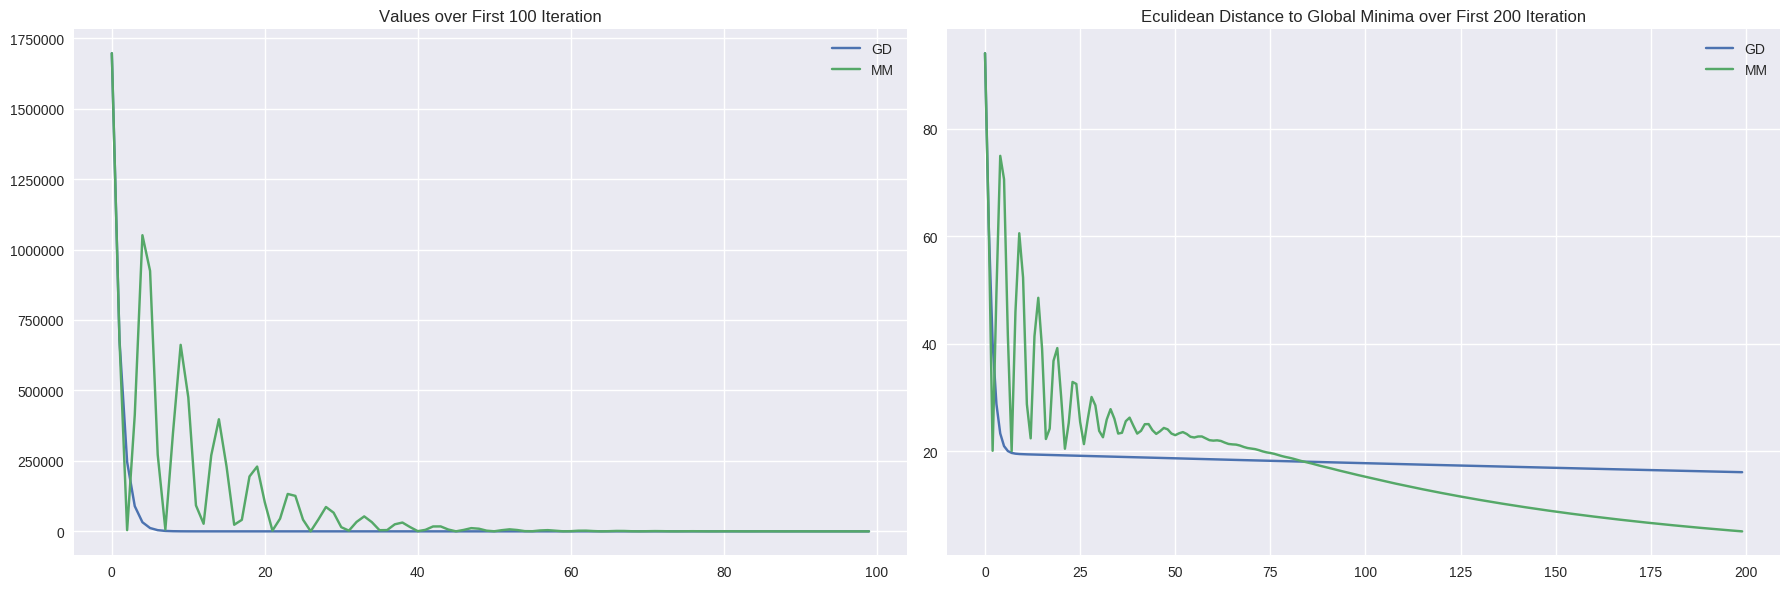

In [8]:
path1, grad1 = gradient_descent(f2, np.array([80.0, -50.0]), lr=0.001, step_num=1000)
path2, grad2, velc2 = momentum(f2, np.array([80.0, -50.0]), lr=0.001, step_num=1000)
print('GD:', path1[-1])
print('MM:', path2[-1])

fig = plt.figure(figsize=(18, 6), dpi=100)
ax0 = fig.add_subplot(121, projection='3d')
ax0 = plot_3d(ax0, f2, elev=50, azim=50, limit=100)
ax0 = plot_3d_path(ax0, f2, path1[:, 0], path1[:, 1])
ax1 = fig.add_subplot(122, projection='3d')
ax1 = plot_3d(ax1, f2, elev=50, azim=50, limit=100)
ax1 = plot_3d_path(ax1, f2, path2[:, 0], path2[:, 1])
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(18, 6))
ax[0].set_title('Values over First 100 Iteration')
ax[0].plot(f2(path1.T[:, :100]), label='GD')
ax[0].plot(f2(path2.T[:, :100]), label='MM')
ax[0].legend()
ax[1].set_title('Eculidean Distance to Global Minima over First 200 Iteration')
ax[1].plot(LA.norm(path1[:200] - (1, 1), axis=1), label='GD')
ax[1].plot(LA.norm(path2[:200] - (1, 1), axis=1), label='MM')
ax[1].legend()
fig.tight_layout()
plt.show()

[ 8.970814e-13 -8.970814e-13]
[-4.3096526e-11  4.3096526e-11]


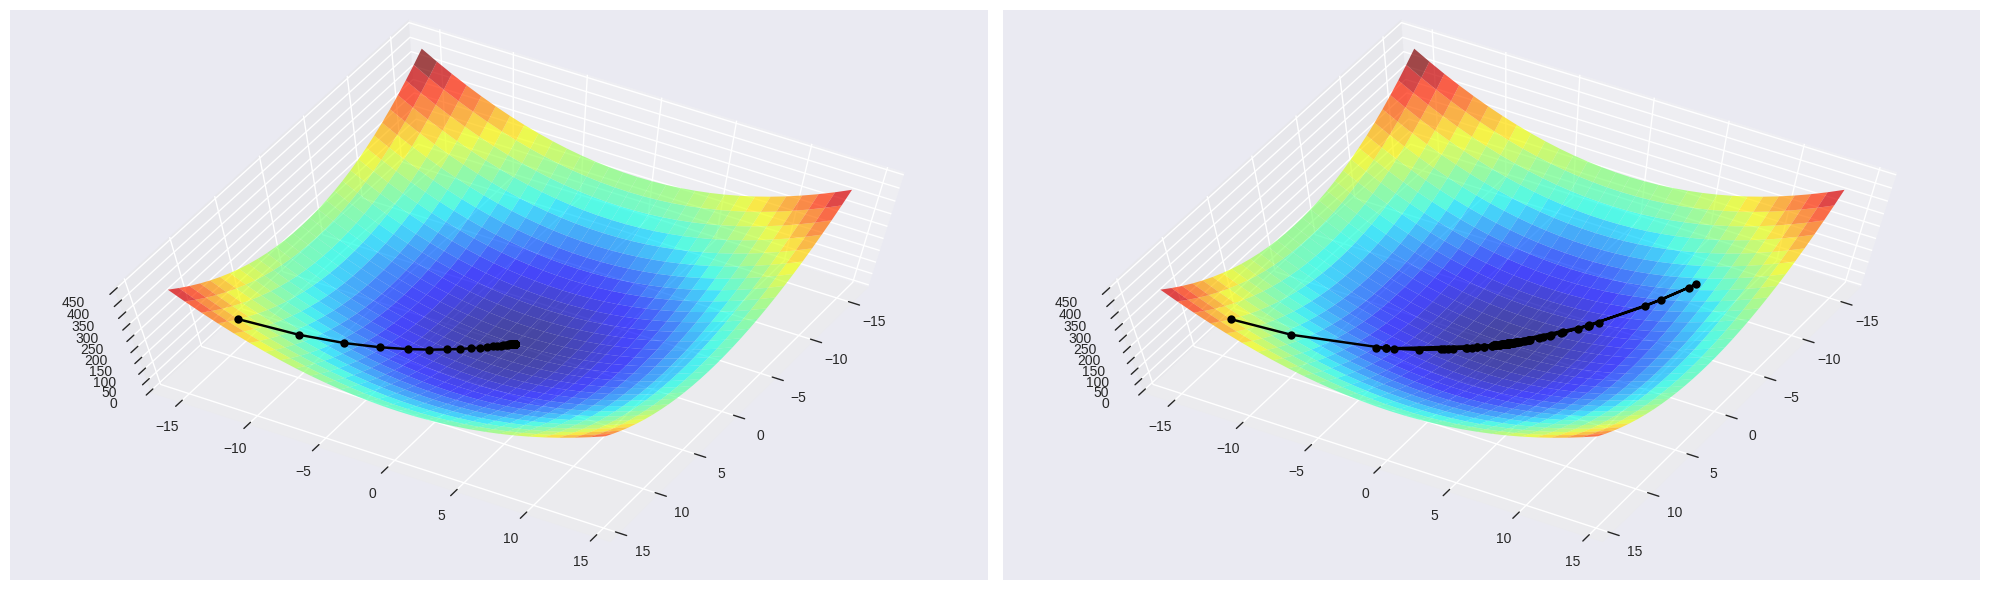

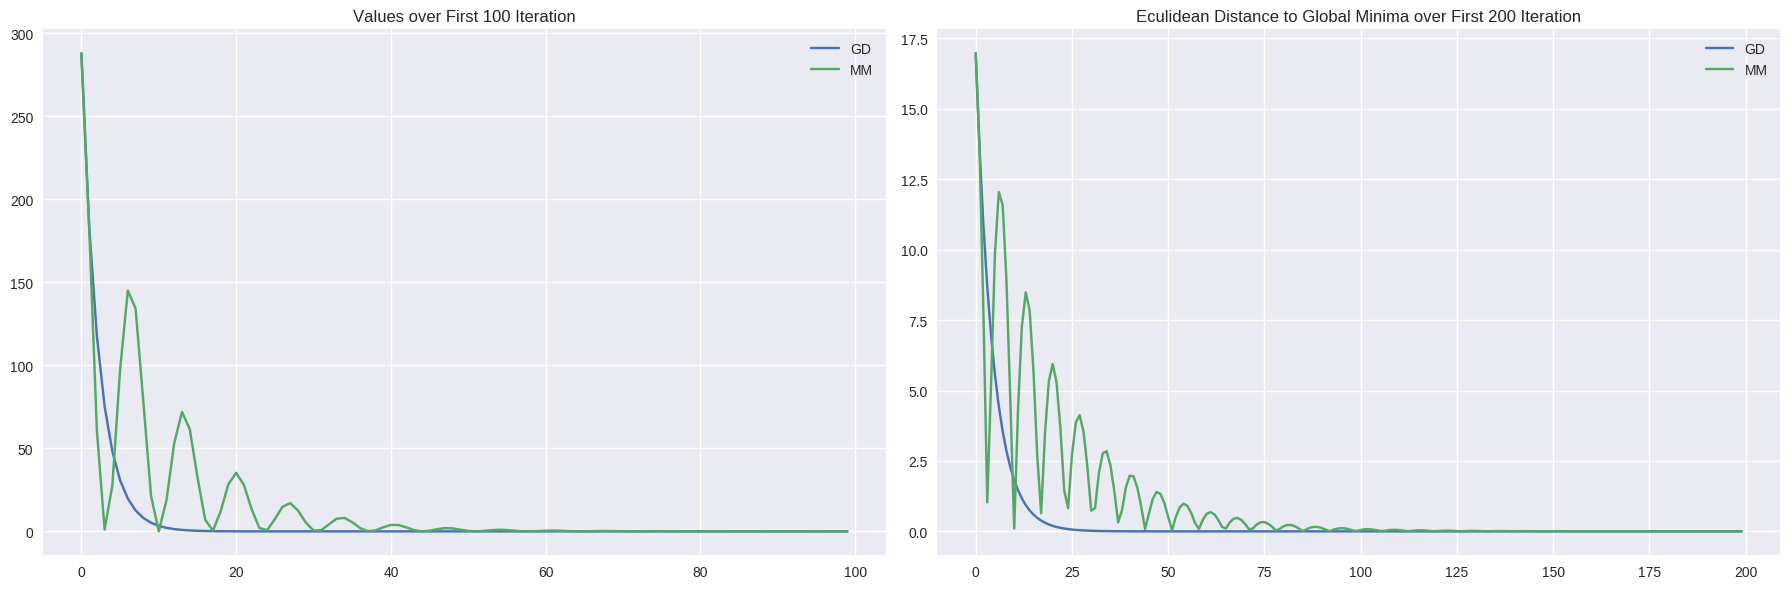

In [9]:
path1, grad1 = gradient_descent(f3, np.array([12.0, -12.0]), lr=0.1, step_num=500)
path2, grad2, velc2 = momentum(f3, np.array([12.0, -12.0]), lr=0.1, step_num=500)
print(path1[-1])
print(path2[-1])

fig = plt.figure(figsize=(20, 6), dpi=100)
ax0 = fig.add_subplot(121, projection='3d')
ax0 = plot_3d(ax0, f3, elev=70, azim=30, limit=15)
ax0 = plot_3d_path(ax0, f3, path1[:, 0], path1[:, 1])
ax1 = fig.add_subplot(122, projection='3d')
ax1 = plot_3d(ax1, f3, elev=70, azim=30, limit=15)
ax1 = plot_3d_path(ax1, f3, path2[:, 0], path2[:, 1])
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(18, 6))
ax[0].set_title('Values over First 100 Iteration')
ax[0].plot(f3(path1.T[:, :100]), label='GD')
ax[0].plot(f3(path2.T[:, :100]), label='MM')
ax[0].legend()
ax[1].set_title('Eculidean Distance to Global Minima over First 200 Iteration')
ax[1].plot(LA.norm(path1[:200], axis=1), label='GD')
ax[1].plot(LA.norm(path2[:200], axis=1), label='MM')
ax[1].legend()
fig.tight_layout()
plt.show()

[ 7.956646e-02 -9.299228e-13]
[4.6145227e-11 4.3096526e-11]


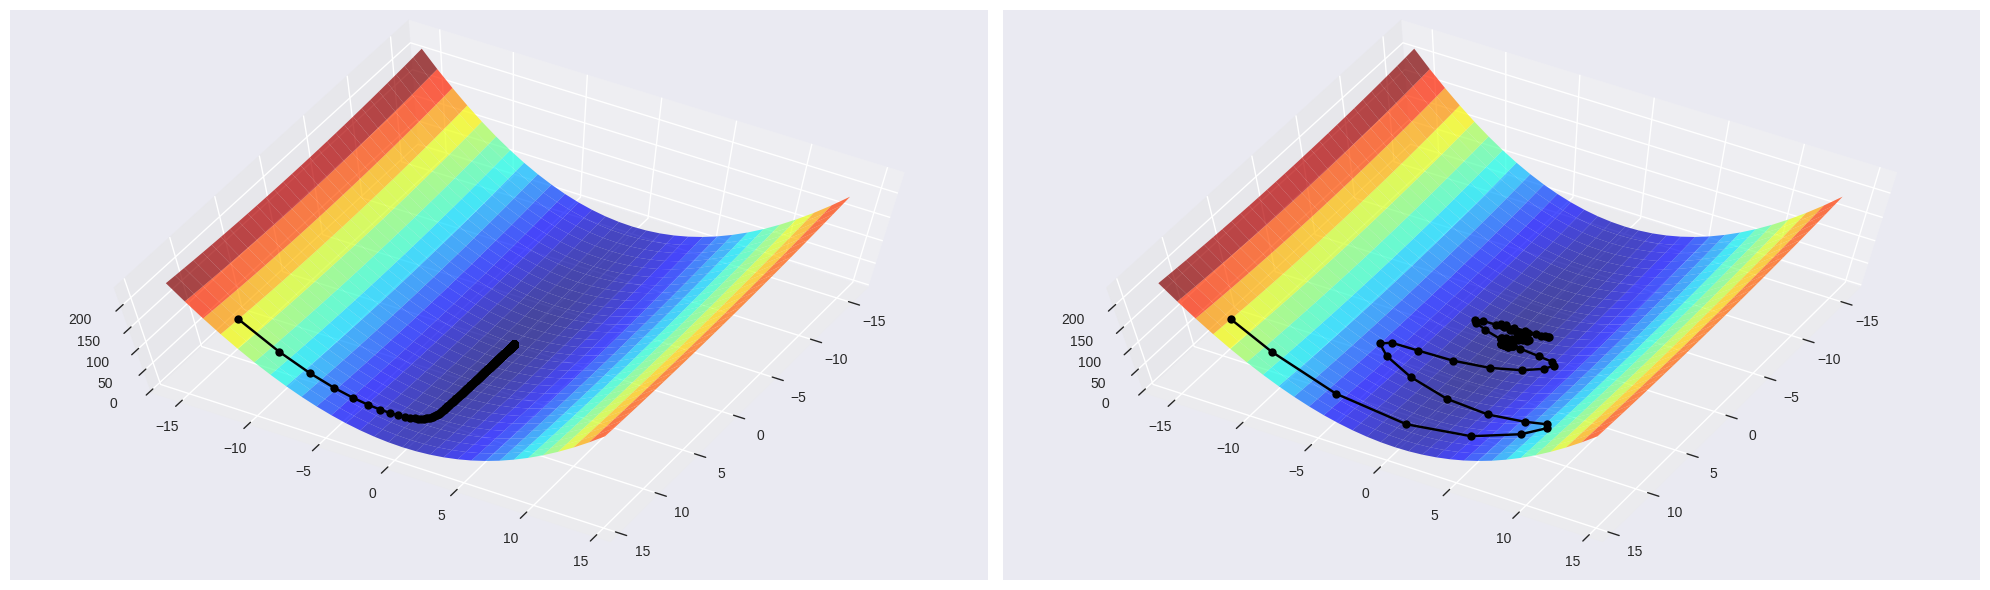

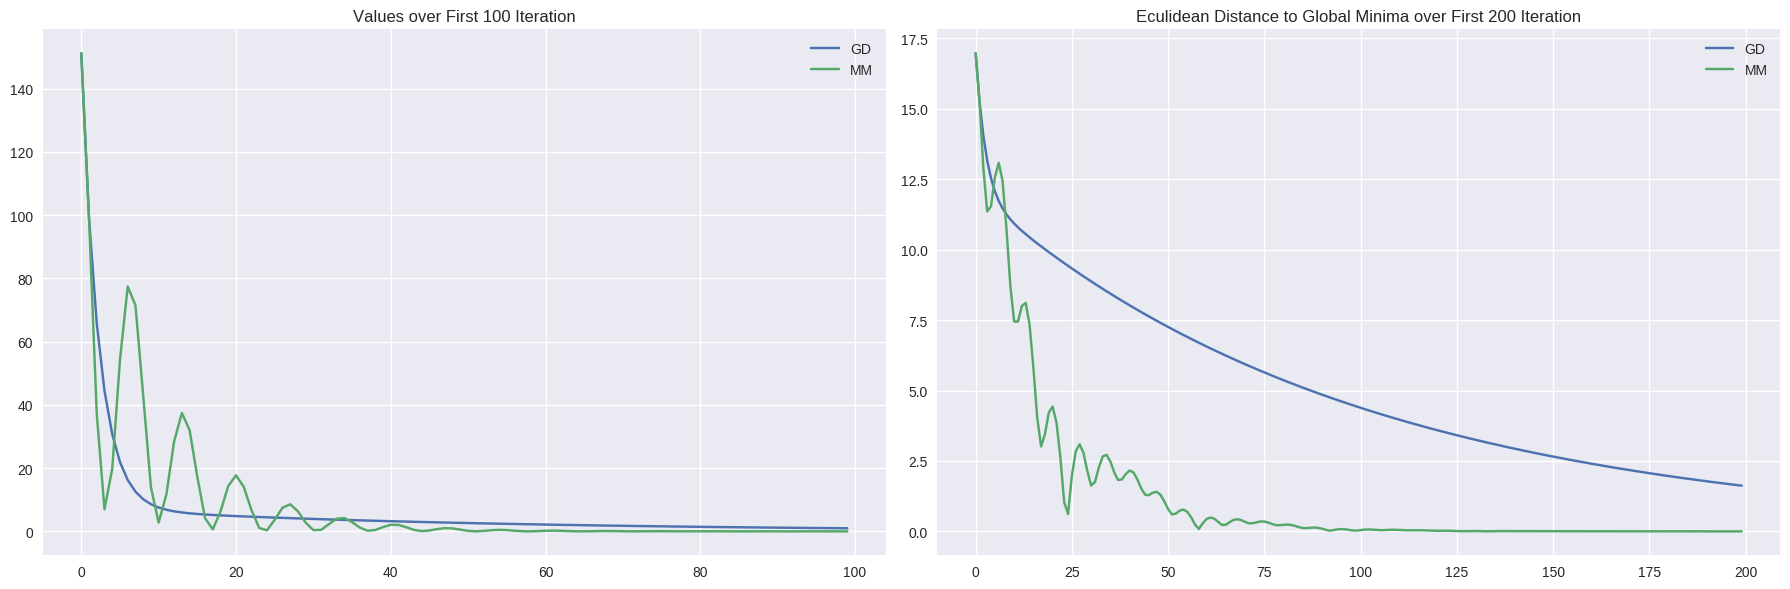

In [10]:
path1, grad1 = gradient_descent(f4, np.array([12.0, -12.0]), lr=0.1, step_num=500)
path2, grad2, velc2 = momentum(f4, np.array([12.0, -12.0]), lr=0.1, step_num=500)
print(path1[-1])
print(path2[-1])

fig = plt.figure(figsize=(20, 6), dpi=100)
ax0 = fig.add_subplot(121, projection='3d')
ax0 = plot_3d(ax0, f4, elev=70, azim=30, limit=15)
ax0 = plot_3d_path(ax0, f4, path1[:, 0], path1[:, 1])
ax1 = fig.add_subplot(122, projection='3d')
ax1 = plot_3d(ax1, f4, elev=70, azim=30, limit=15)
ax1 = plot_3d_path(ax1, f4, path2[:, 0], path2[:, 1])
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(18, 6))
ax[0].set_title('Values over First 100 Iteration')
ax[0].plot(f4(path1.T[:, :100]), label='GD')
ax[0].plot(f4(path2.T[:, :100]), label='MM')
ax[0].legend()
ax[1].set_title('Eculidean Distance to Global Minima over First 200 Iteration')
ax[1].plot(LA.norm(path1[:200], axis=1), label='GD')
ax[1].plot(LA.norm(path2[:200], axis=1), label='MM')
ax[1].legend()
fig.tight_layout()
plt.show()